Classification Project - Telco Co. Churn

In [1]:
# imports
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import numpy as np
from pydataset import data
import pandas as pd
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# import useful modules
import acquire
import prepare

Data Acquisition

In [2]:
# acquire TecoCo data
df = acquire.get_telco_data()
df

Let me get that for you...


,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,7040,1,2,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


In [3]:
#check data for any missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
# check for any missing values
print(df.isnull().sum())

Unnamed: 0                  0
internet_service_type_id    0
payment_type_id             0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
payment_type                0
internet_service_type       0
dtype: int64


Data Preparation

Dropped columns = ['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id']. These columns held no intel value.

Created dummy columns of ['gender', 'payment_type', 'contract_type', 'internet_service_type']

- gender_Male = '0' is female, '1' is male
- payment_type = electronic check, mailed check, credit card( 0 is not automatic, 1 is automatic)
- contract_type = one year, two year
- internet_service_type = Fiber optic(0 is DSL, 1 is Fiber Optic), None

In [5]:
# prepare data telco data for modeling
telco_data = prepare.prep_telco(df)
# rename columns with spaces to underscores
telco_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
telco_data


,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,gender_Male,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None
0,0002-ORFBO,0,Yes,Yes,9,Yes,No,No,Yes,No,...,593.3,0,0,0,0,1,1,0,0,0
1,0003-MKNFE,0,No,No,9,Yes,Yes,No,No,No,...,542.4,0,1,0,0,1,0,0,0,0
2,0004-TLHLJ,0,No,No,4,Yes,No,No,No,Yes,...,280.85,1,1,0,1,0,0,0,1,0
3,0011-IGKFF,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1237.85,1,1,0,1,0,0,0,1,0
4,0013-EXCHZ,1,Yes,No,3,Yes,No,No,No,No,...,267.4,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,No,No,13,Yes,No,Yes,No,No,...,742.9,0,0,0,0,1,1,0,0,0
7039,9992-RRAMN,0,Yes,No,22,Yes,Yes,No,No,No,...,1873.7,1,1,0,1,0,0,0,1,0
7040,9992-UJOEL,0,No,No,2,Yes,No,No,Yes,No,...,92.75,0,1,0,0,1,0,0,0,0
7041,9993-LHIEB,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,4627.65,0,1,0,0,1,0,1,0,0


Split the data into train, validate, test

In [6]:
# split telco data
train, validate, test = prepare.split_telco_churn(telco_data)
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 25)
(1691, 25)
(1409, 25)


In [7]:
train.describe()

,senior_citizen,tenure,monthly_charges,churn,gender_Male,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.159777,31.929242,64.342594,0.265280,0.517119,0.216333,0.340857,0.224195,0.207963,0.234593,0.432665,0.218869
std,0.366445,24.494531,29.979115,0.441538,0.499770,0.411796,0.474058,0.417104,0.405902,0.423798,0.495508,0.413532
min,0.000000,0.000000,18.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,35.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,70.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.600000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Exploration

- determinme the drivers of churn
- visulize the data
- run statistical test
- create a baseline model

In [8]:
# Find the overall churn rate of the train dataset
# calculate the overall churn rate
train.churn.value_counts(normalize=True) 


0    0.73472
1    0.26528
Name: churn, dtype: float64

26.5% of people have churned where 73.5% of people have not churned.

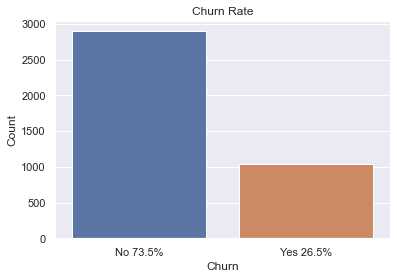

In [9]:
# visualize the churn rate
sns.set(style="darkgrid")
ax = sns.countplot(x='churn', data=train)
ax.set_title('Churn Rate')
ax.set_xlabel('Churn')
ax.set_ylabel('Count') 
ax.set_xticklabels(['No 73.5%', 'Yes 26.5%'])
plt.show()

In [111]:
# create two dataframes for churn and no churn
train_churn = train[train.churn == 1]
train_no_churn = train[train.churn == 0]

In [10]:
# create a correlation matrix of the telco data
corr_matrix = train.corr()
corr_matrix
# print only the churn column
corr_matrix['churn']

senior_citizen                          0.156587
tenure                                 -0.352443
monthly_charges                         0.202305
churn                                   1.000000
gender_Male                            -0.004491
payment_type_Credit_card_(automatic)   -0.117592
payment_type_Electronic_check           0.297489
payment_type_Mailed_check              -0.097120
contract_type_One_year                 -0.197497
contract_type_Two_year                 -0.290636
internet_service_type_Fiber_optic       0.318199
internet_service_type_None             -0.229152
Name: churn, dtype: float64

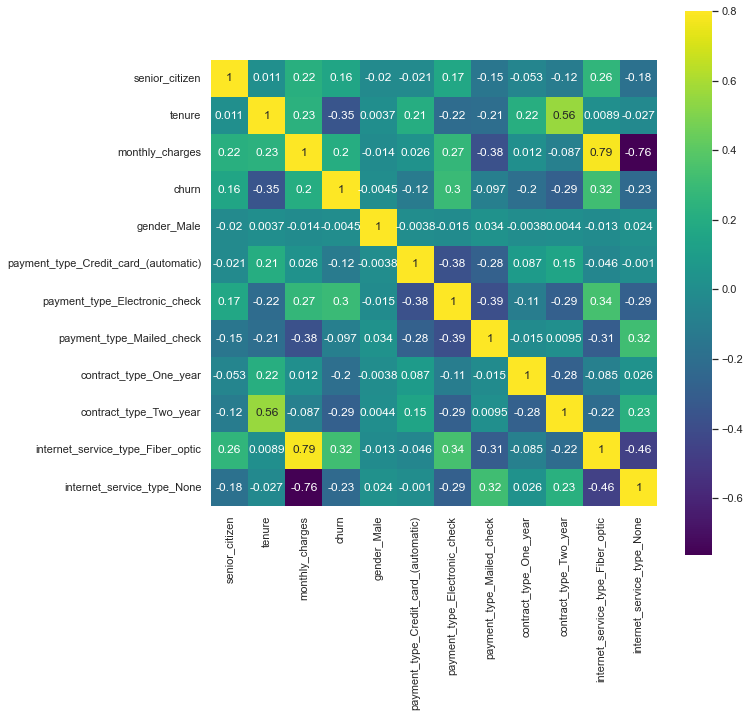

In [11]:
# visualize the upper triangle of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True, cmap='viridis')
plt.show()

In [12]:
# identify which variables are correlated with churn the most
corr_matrix['churn'].sort_values(ascending=False)

churn                                   1.000000
internet_service_type_Fiber_optic       0.318199
payment_type_Electronic_check           0.297489
monthly_charges                         0.202305
senior_citizen                          0.156587
gender_Male                            -0.004491
payment_type_Mailed_check              -0.097120
payment_type_Credit_card_(automatic)   -0.117592
contract_type_One_year                 -0.197497
internet_service_type_None             -0.229152
contract_type_Two_year                 -0.290636
tenure                                 -0.352443
Name: churn, dtype: float64

It appears that in internet_service_type_Fiber optic and payment_type_Electronic check have the highest positive correlation to churn. While contract_type_Two year and tenure has the highest negative correlation to churn.

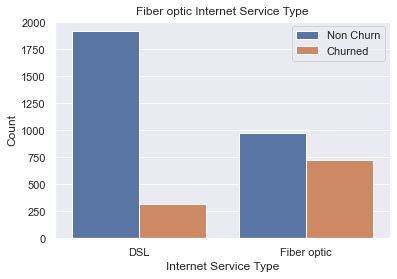

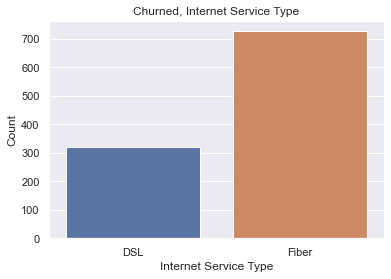

1    727
0    319
Name: internet_service_type_Fiber_optic, dtype: int64


In [122]:
# utilizing train dataset create a bar of the internet_service_type_Fiber_optic for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='internet_service_type_Fiber_optic', hue='churn', data=train)
ax.set_title('Fiber optic Internet Service Type')
ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['DSL', 'Fiber optic'])
ax.legend(['Non Churn', 'Churned'], loc='upper right')
plt.show()
# utilize train_churn dataset create a bar of the internet_service_type_Fiber_optic for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='internet_service_type_Fiber_optic', data=train_churn)
ax.set_title('Churned, Internet Service Type')
ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['DSL', 'Fiber'])
plt.show()
# of those who have churned how many use fiber optic
print(train_churn.internet_service_type_Fiber_optic.value_counts())

There is a significant increase of Fiber users who have churned vs those who have not.

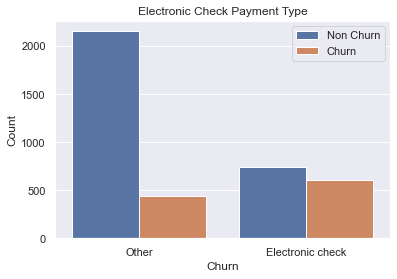

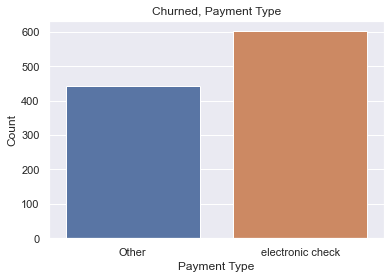

In [127]:
# create a bar of the payment_type_Electronic_check for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='payment_type_Electronic_check', hue='churn', data=train)
ax.set_title('Electronic Check Payment Type')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Electronic check'])
ax.legend(['Non Churn', 'Churn'], loc='upper right')
plt.show()
# decribe the churn rate by the payment type
train.groupby('payment_type_Electronic_check')['churn'].value_counts(normalize=True)
# utilize train_churn dataset create a bar of the payment_type_Electronic_check for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='payment_type_Electronic_check', data=train_churn)
ax.set_title('Churned, Payment Type')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'electronic check'])
plt.show()


The majority of churned utilized electronic checks.

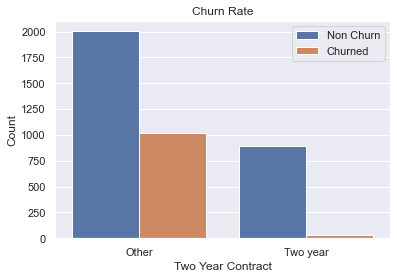

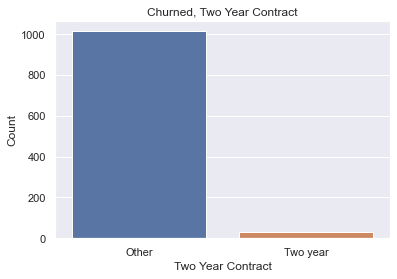

In [130]:
# create a bar of the contract_type_two_year for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='contract_type_Two_year',hue='churn', data=train)
ax.set_title('Churn Rate')
ax.set_xlabel('Two Year Contract')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Two year'])
ax.legend(['Non Churn', 'Churned'], loc='upper right')
plt.show()
# the percentage that have churned on a two year contract
train.churn.value_counts(normalize=True)
# utilize train_churn dataset create a bar of the contract_type_Two_years for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='contract_type_Two_year', data=train_churn)
ax.set_title('Churned, Two Year Contract')
ax.set_xlabel('Two Year Contract')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Two year'])
plt.show()


The majority of customer who have churned are not on a two-year contract.

In [84]:
# look at tenure vs churn
# create a new column for tenure_years
train['tenure_years'] = round(train['tenure']/12).astype(int)

In [83]:
# determine the churn rate of customers that have less than 1 year of tenure
oneyr = train[train['tenure_years'] <= 1]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 1 and 2 years of tenure
twoyr = train[(train['tenure_years'] > 1) & (train['tenure_years'] <= 2)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 2 and 3 years of tenure
threeyr = train[(train['tenure_years'] > 2) & (train['tenure_years'] <= 3)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 3 and 4 years of tenure
fouryr = train[(train['tenure_years'] > 3) & (train['tenure_years'] <= 4)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 4 and 5 years of tenure
fiveyr = train[(train['tenure_years'] > 4) & (train['tenure_years'] <= 5)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have more than 5 years of tenure
moreyr = train[train['tenure_years'] > 5]['churn'].value_counts(normalize=True)
# print the churn rates replace 0 with not churned and 1 with churned
print('Less than 1 year:', round(oneyr[1], 3),'has churned')
print('Between 1 and 2 years:', round(twoyr[1], 3),'has churned')
print('Between 2 and 3 years:', round(threeyr[1], 3),'has churned')
print('Between 3 and 4 years:', round(fouryr[1], 3),'has churned')
print('Between 4 and 5 years:', round(fiveyr[1], 3),'has churned')
print('More than 5 years:', round(moreyr[1], 3),'has churned')

Less than 1 year: 0.45 has churned
Between 1 and 2 years: 0.232 has churned
Between 2 and 3 years: 0.215 has churned
Between 3 and 4 years: 0.149 has churned
Between 4 and 5 years: 0.099 has churned
More than 5 years: 0.067 has churned


The majority of customers who have churned have a tenure less than 1 year.

PRE-Conclusion:
For customers under a year of tenure, Offer to switch payment types form electronic payments to automatic.
If customers under a year of tenure has Fiber service offer to switch to DSL. Figure out whats wrong with Fiber.
Customer under a year of tenure try to lock them in a two year contract.